Época 10000, Erro médio: 0.50000
Época 20000, Erro médio: 0.50000
Época 30000, Erro médio: 0.50000
Época 40000, Erro médio: 0.50000
Época 50000, Erro médio: 0.50000
Época 60000, Erro médio: 0.50000
Época 70000, Erro médio: 0.50000
Época 80000, Erro médio: 0.50000
Época 90000, Erro médio: 0.50000
Época 100000, Erro médio: 0.50000
Época 110000, Erro médio: 0.50000
Época 120000, Erro médio: 0.50000
Época 130000, Erro médio: 0.50000
Época 140000, Erro médio: 0.50000
Época 150000, Erro médio: 0.50000
Época 160000, Erro médio: 0.50000
Época 170000, Erro médio: 0.50000
Época 180000, Erro médio: 0.50000

🧪 Saída final após treinamento: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
🎯 Saída esperada: [0 1 1 0]
📉 Erro médio final: 0.50000


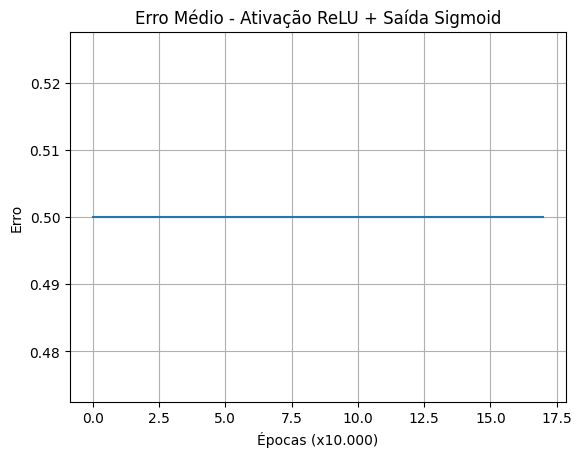

In [18]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Função ReLU e sua derivada
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Função Sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Inicializar entradas XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # Matriz 2x4
d = np.array([0, 1, 1, 0])                       # Saída esperada

# Parâmetros da rede
inputSize = 2
hiddenSize = 2
outputSize = 1
lr = 0.1
epochs = 180000

# Inicializar pesos e vieses
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
b1 = np.random.rand(hiddenSize, 1) * 2 - 1
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
b2 = np.random.rand(outputSize, 1) * 2 - 1

error_list = []

# ---------- Treinamento usando ReLU ----------
for epoch in range(epochs):
    # Forward Pass
    z1 = np.dot(w1, X) + b1
    a1 = relu(z1)  # Ativação ReLU

    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)  # Saída final com sigmoid

    # Backpropagation
    error = d - a2
    da2 = error * sigmoid_derivative(z2)

    da1 = np.dot(w2.T, da2)
    dz1 = da1 * relu_derivative(z1)  # Derivada da ReLU

    # Atualização dos pesos
    w2 += lr * np.dot(da2, a1.T)
    b2 += lr * np.sum(da2, axis=1, keepdims=True)
    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)

    # Registro de erro
    if (epoch+1) % 10000 == 0:
        print(f"Época {epoch+1}, Erro médio: {np.average(abs(error)):.5f}")
        error_list.append(np.average(abs(error)))

# ---------- Teste após treinamento ----------
z1 = np.dot(w1, X) + b1
a1 = relu(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)

print("\n🧪 Saída final após treinamento:", np.round(a2.T, 3))
print("🎯 Saída esperada:", d)
print(f"📉 Erro médio final: {np.average(abs(error)):.5f}")

# ---------- Plotar curva de erro ----------
plt.plot(error_list)
plt.title('Erro Médio - Ativação ReLU + Saída Sigmoid')
plt.xlabel('Épocas (x10.000)')
plt.ylabel('Erro')
plt.grid(True)
plt.show()
